In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 259.3 kB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 151.9 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 277.5 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 195.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 291.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 239.4 kB/s eta 0:00:0000:0100:01
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 103.5 kB/s eta 0:00:00a 0:00:01


/var/folders/11/txp2ly011sgbfdgd5l9wh3rh0000gn/T/ipykernel_79022/2099543055.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
# carga el archivo airbnb_01_2017-02_2023.csv en un dataframe llamado 'csv'
# ubicado en la ruta '/Users/usuario/Downloads'
csv = pd.read_csv('./static/airbnb_01_2019-01_2024.csv')

# selecciona los valores de la columna 'Pagado' cuando la columna 'Moneda' es 'USD'
# y la agrega al dataframe 'csv' como una nueva columna llamada 'Ingresos en USD'
csv['Ingresos en USD'] = csv['Cobrado'][csv['Moneda'] == 'USD']

# selecciona los valores de la columna 'Pagado' cuando la columna 'Moneda' no es 'USD'
# y la agrega al dataframe 'csv' como una nueva columna llamada 'Ingresos_ARS_precios constantes'
csv['Ingresos en $ (corrientes)'] = csv['Cobrado'][csv['Moneda'] == 'ARS']

# Convierte la columna 'Fecha' en el 'DateTimeIndex' del dataframe 'csv' setandola como el índice
csv['Fecha'] = pd.to_datetime(csv['Fecha'])
csv.set_index('Fecha', inplace=True)
csv.index = pd.to_datetime(csv.index, format='%Y-%m-%d')

# crea un df1 que contenga las columnas 'Código de confirmación', 'Fecha de inicio', 'Noches', y 'Huésped' en los casos que la columna 'Tipo' sea 'Reserva'
df1 = csv[
    [
        'Noches',
        'Huésped',
    ]
][csv['Tipo'] == 'Reserva']
df1.shape

(54, 2)

In [9]:
# crea un df2 cel dataframe 'csv' que contenga las columnas 'Ingresos en USD' e'Ingresos en $ (corrientes)' en los casos que la columna 'Tipo' sea 'Payout'
df2 = csv[
    [
        'Ingresos en USD',
        'Ingresos en $ (corrientes)'
    ]
][csv['Tipo'] == 'Payout']


In [10]:
# elimina la fila de df2 que corresponde al índice '2020-04-29'
df2.drop('2020-04-29', inplace=True)
df2.shape

(54, 2)

In [11]:

# crea un df3 a partir de concatenar los dataframes df1 y df2 por el valor de sus índices
df3 = pd.concat([df1, df2], axis=1)

# Quita del df3 las filas con la mayoría de valores nulos
df3 = df3.dropna(thresh=3)

# Ordena el df3 por fecha de menor a mayor
df3.sort_index(inplace=True)

# Agrega una columna llamada índice al df3 que cuantifique la cantidad de filas que tiene el df3
df3['Número de reserva'] = range(1, len(df3) + 1)
df3.shape

(49, 5)

In [27]:
# carga un csv con los valores de la cotización del dolar blue llamado 'evolution_blue_ars.csv'
# ubicado en la ruta '/Users/usuario/Downloads/'
# setea la columna 'day' como el índice
# setea la columna 'day' como el 'DateTimeIndex'
# y la convierte en el formato '%Y-%m-%d'
cotizacion = pd.read_csv('./static/blue.csv')
cotizacion.set_index('Fecha', inplace=True)

# transdorma el índice de cotizaciones para que sea igual al de df3
cotizacion.index = pd.to_datetime(cotizacion.index, format='%d/%m/%Y')
# conserva solo las filas de cotización cuyo timestamp se corresponda con las fechas de la lista 'fechas'
cotizacion = cotizacion[cotizacion.index.isin(df3.index)]

# concatena el df3 con el df de cotización
df3 = pd.concat([df3, cotizacion], axis=1)

# renombra la columna 'Compra' como 'Precio dolar blue compra' y la columna 'Venta' como 'Precio dolar blue venta'
df3.rename(columns={'Compra': 'Precio dolar blue compra', 'Venta': 'Precio dolar blue venta'}, inplace=True)

# reorganiza el df para que sus columnas queden en el siguiente orden:
# 'Numero de reserva', 'Noches' (renombrala como 'Duración de la estadía'), 'Huésped' , 'Ingresos en USD', 'Ingresos en $ (corrientes)','Precio dolar blue compra', 'Precio dolar blue venta'
df4 = df3[['Número de reserva', 'Huésped',  'Noches'  , 'Ingresos en USD', 'Ingresos en $ (corrientes)','Precio dolar blue venta', 'Precio dolar blue compra']].copy()
df4.rename(columns={'Noches': 'Duración de la estadía'}, inplace=True)

# Elimina las columnas duplicadas
df4 = df4.loc[:,~df4.columns.duplicated()]

# agrega al df4 una columna entre la comuna 'Ingresos en USD' y la columna 'Ingresos en $ (corrientes)', denominala 'Equivalencia en USD' y guarda en ella el resultado de dividir la columna 'Ingresos en $ (corrientes)' por la columna 'Precio dolar blue compra'
df4.insert(4, 'Equivalencia en USD', df4['Ingresos en $ (corrientes)'].astype(float) / df4['Precio dolar blue compra'].astype(float))
df4['Equivalencia en USD'] = df4['Equivalencia en USD'].round(1)
for x in range(df4['Equivalencia en USD'].shape[0]):
    df4['Equivalencia en USD'][x] = df4['Ingresos en USD'][x] if df4['Ingresos en USD'][x] > 0 else df4['Equivalencia en USD'][x]

# Interpola los valores faltantes de la columna 'Precio dolar blue compra' y 'Precio dolar blue venta'
df4['Precio dolar blue compra'].interpolate(method='linear', inplace=True)
df4['Precio dolar blue venta'].interpolate(method='linear', inplace=True)
df4.head(45)

ValueError: could not convert string to float: '41,70'

In [ ]:
fig.update_layout(
    title='Evolución de los ingresos en USD por mes (USD + Equivalente en USD de ingresos en $ARS)',
    xaxis_title='Fecha',
    yaxis_title='Valor en USD',
    xaxis_tickangle=-45,
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)]
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[None, {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}]
                ),
            ]
        ),
    ],
    sliders=sliders  # Add the sliders here
)

fig.show()



<ipython-input-26-dc46a8dcb22f>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-26-dc46a8dcb22f>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



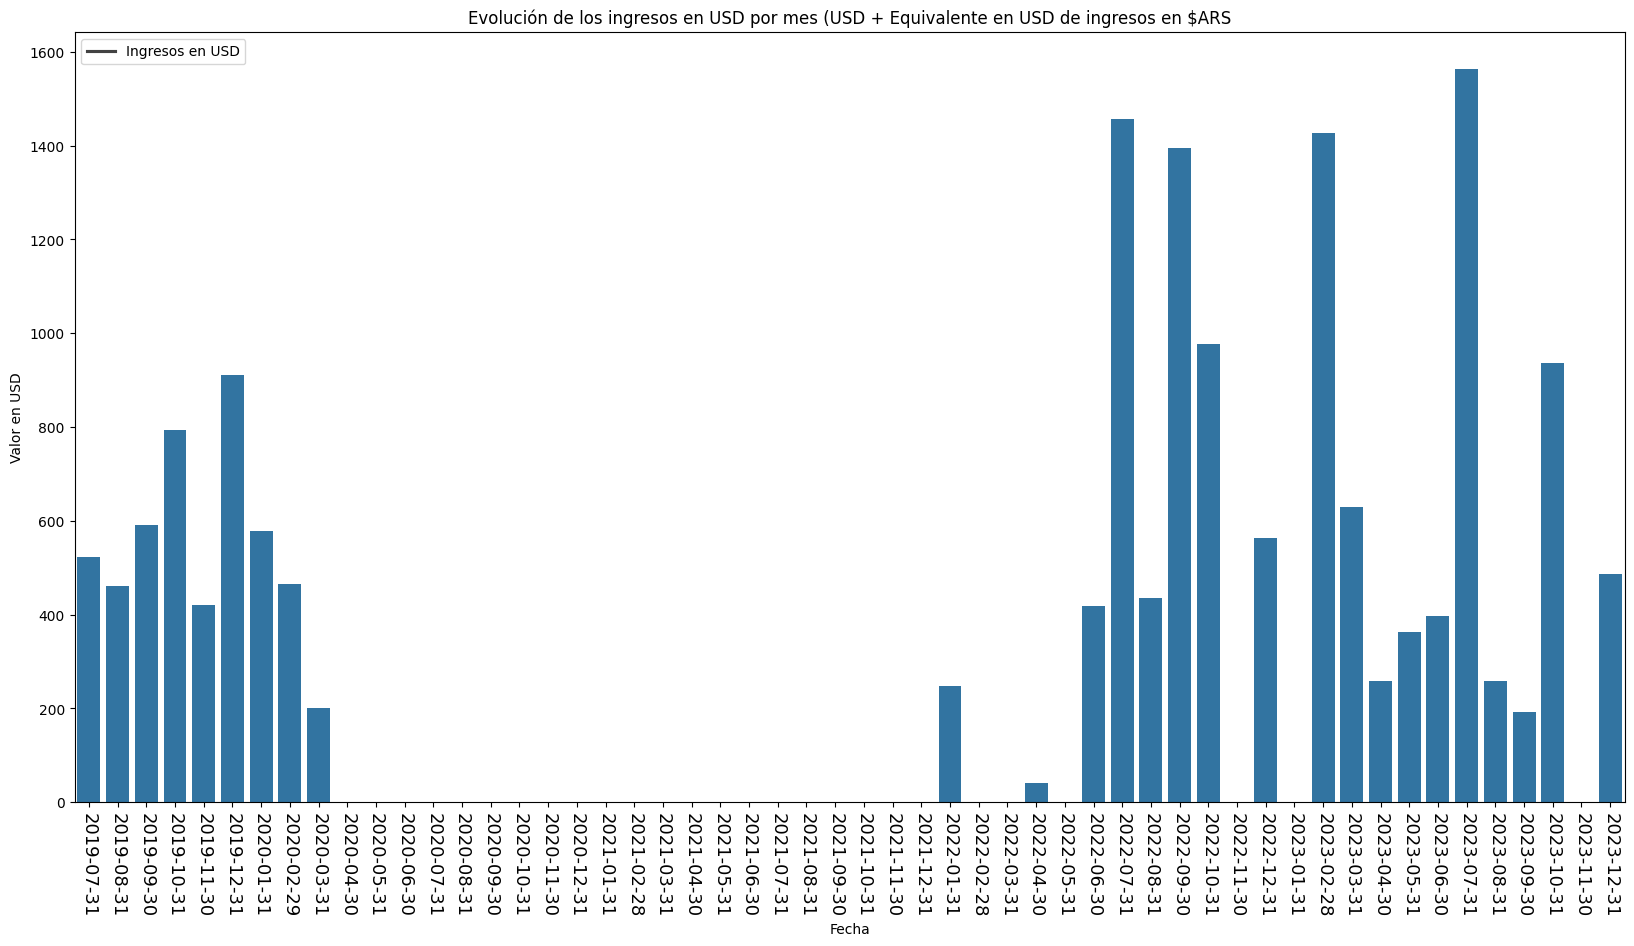

In [ ]:
# Realiza dos gráficas con la librería Seaborn, una de barras y otra de línea, una al lado de la otra
# Representa con ellas evolución de los ingresos en USD
# setea los título de los gráficos a 'Evolución de los ingresos en USD'
# setea los título de los ejes x a 'Fecha'
# setea los títulos de los ejes y a 'Valor en USD'
# setea la leyenda del gráfico a 'Ingresos en USD' y coloca los indices del eje x en orientación vertical
# grafica la columna 'Equivalencia en USD' del df4 como barras
# grafica en la grafica de lineas la columna 'Equivalencia en USD' del df4 resampleada por semana y tomando el máximo valor de cada mes, e incluyendo todas las semanas comprendidas en entre el primer y el ultimo dato. Completa los valores de las semanas faltantes con 0
# para la gráfica de lineas utiliza un color de línea azul y un marcador de tipo 'o'
# muestra el gráfico
plt.figure(figsize=(20, 10))
sns.barplot(
    x=df4.resample('M').sum().fillna(0).index,
    y='Equivalencia en USD',
    data=df4.resample('M').sum().fillna(0))
plt.title('Evolución de los ingresos en USD por mes (USD + Equivalente en USD de ingresos en $ARS')
plt.xlabel('Fecha')
plt.ylabel('Valor en USD')
plt.legend(['Ingresos en USD'], loc='upper left')
plt.xticks(rotation=270, fontsize=13)
plt.savefig('./ingresos_usd_mes.png')

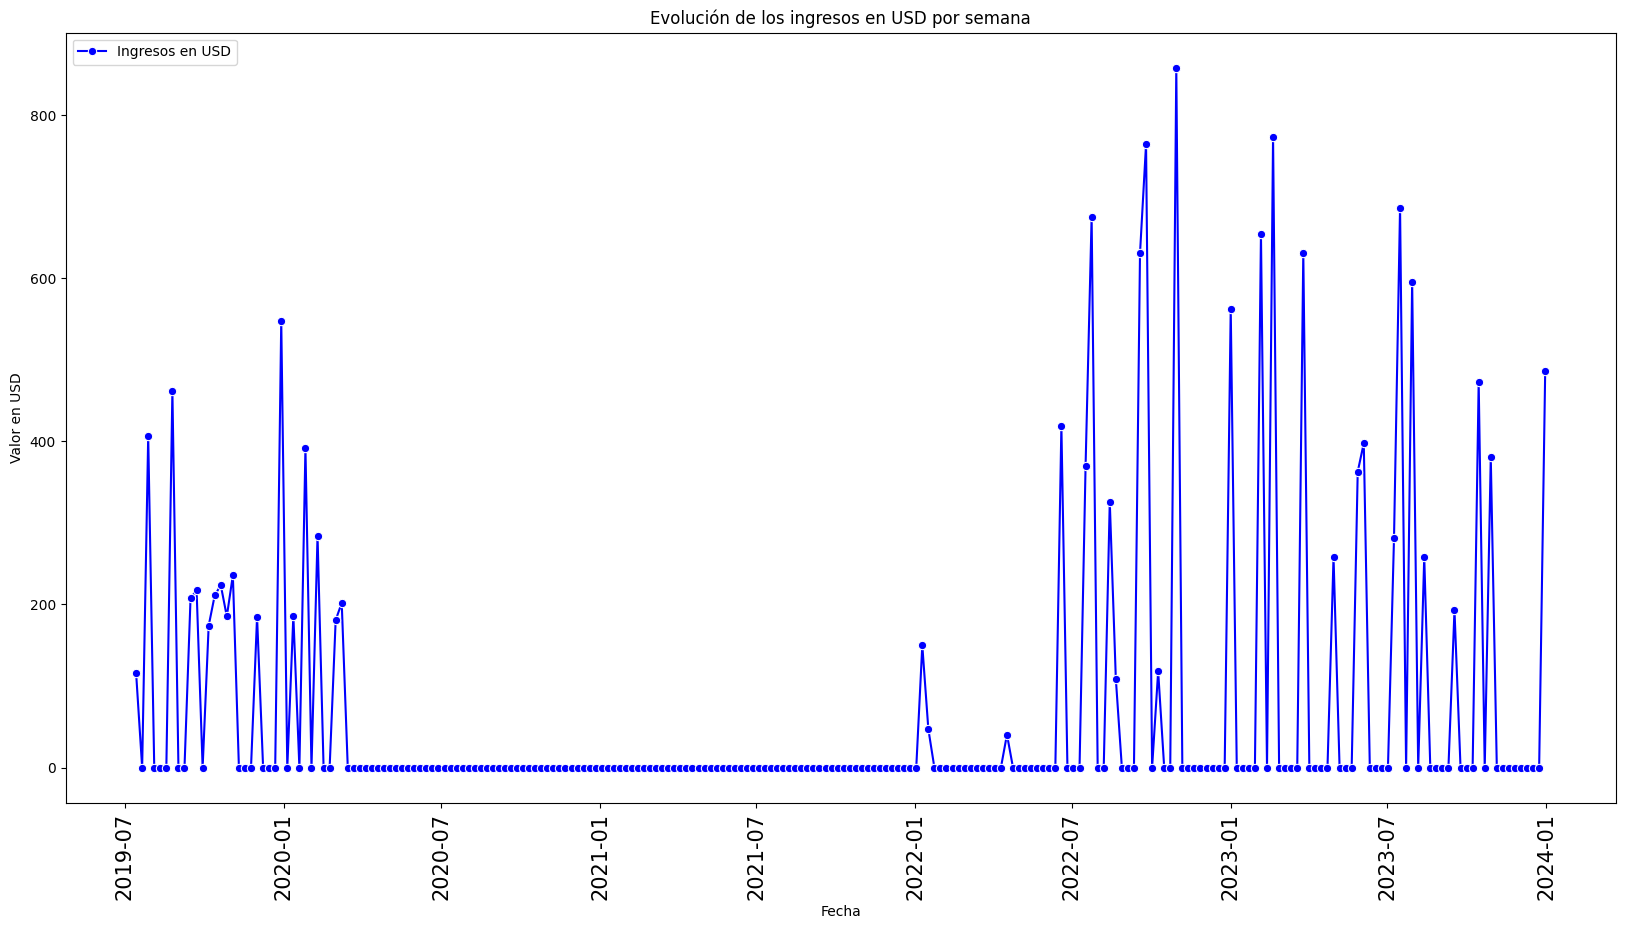

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(
    x=df4.resample('W').max().fillna(0).index,
    y='Equivalencia en USD',
    data=df4.resample('W').max().fillna(0),
    marker='o',
    color='blue'
)
plt.title('Evolución de los ingresos en USD por semana')
plt.xlabel('Fecha')
plt.ylabel('Valor en USD')
plt.legend(['Ingresos en USD'], loc='upper left')
plt.xticks(rotation=90, fontsize=15)
plt.savefig('./ingresos_usd_semana.png')

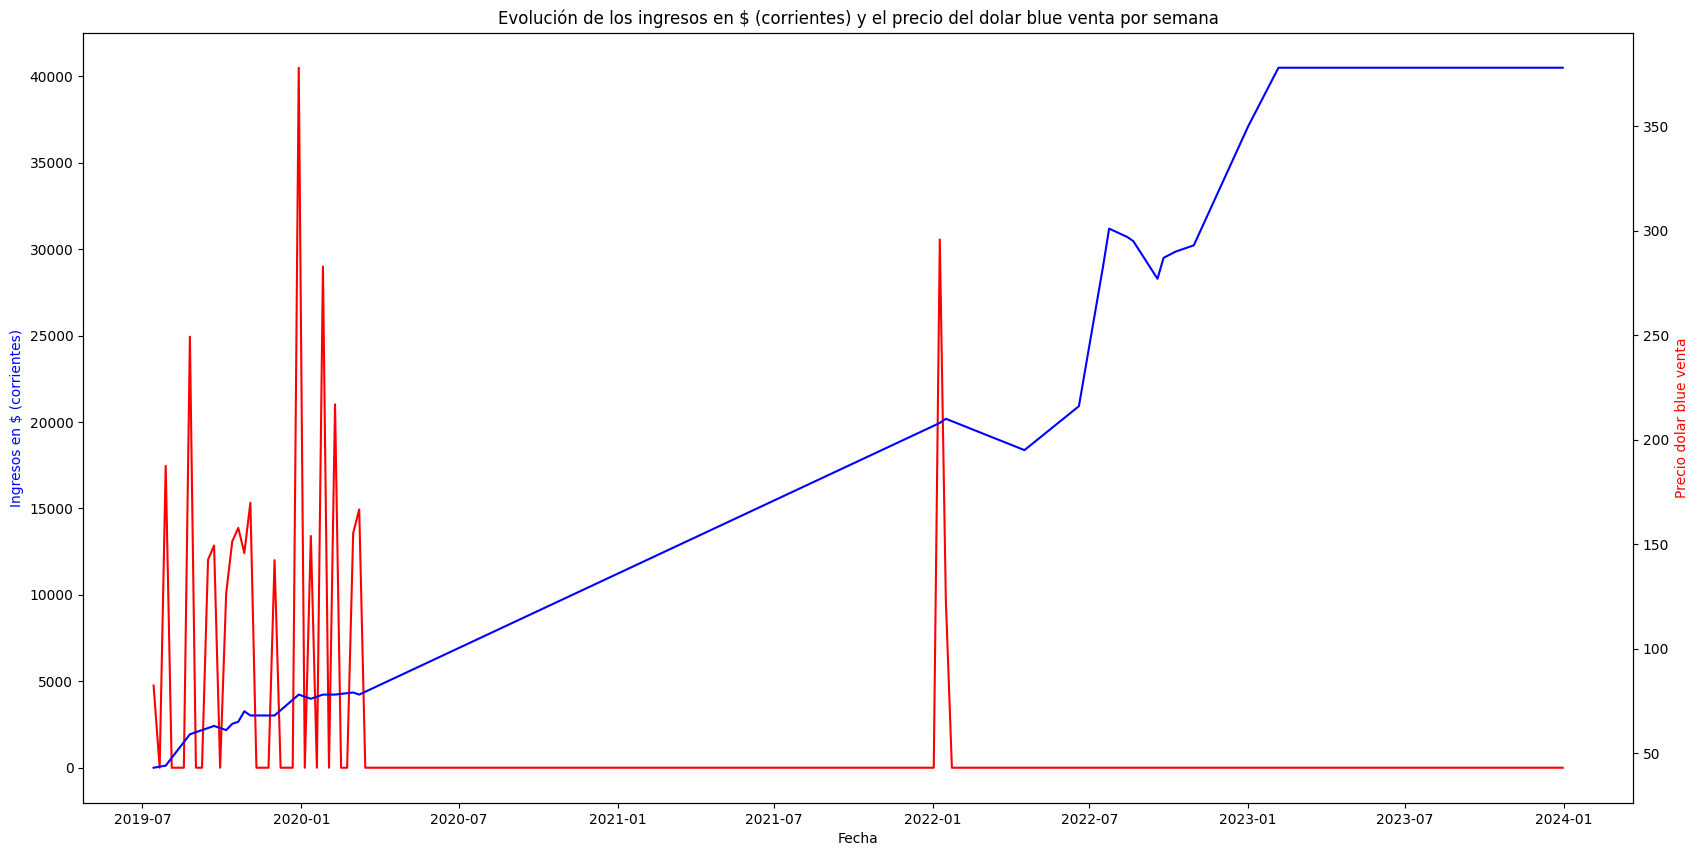

In [ ]:
plt.figure(figsize=(20, 10))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df4.resample('W').max().fillna(0)['Ingresos en $ (corrientes)'], color='red')
ax2.plot(df4.resample('W').max().interpolate()['Precio dolar blue venta'], color='blue')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Ingresos en $ (corrientes)', color='blue')
ax2.set_ylabel('Precio dolar blue venta', color='red')
plt.title('Evolución de los ingresos en $ (corrientes) y el precio del dolar blue venta por semana')
plt.xticks(rotation=90)
plt.savefig('./ingresos_usd_dolar_blue_semana.png')

In [ ]:
print(f'El total de ingresos en USD es de: {df4["Equivalencia en USD"].sum()}')

El total de ingresos en USD es de: 16989.4


In [ ]:
promedio_ingresos_usd_pre_covid = (df4['Equivalencia en USD'].loc['2019-01-01':'2020-03-01'].sum()/8).round(2)
print(f"El promedio reportado por el departamento durante los 8 meses que estuvo en alquiler antes de la cuarentena fue de {promedio_ingresos_usd_pre_covid} USD mensuales")

El promedio reportado por el departamento durante los 8 meses que estuvo en alquiler antes de la cuarentena fue de 592.86 USD mensuales


In [ ]:
promedio_ingresos_usd_post_covid = (df4['Equivalencia en USD'].loc['2021-12-01':].sum()/8).round(2)
print(f"El promedio reportado por el departamento durante los 8 meses que estuvo en alquiler antes de la cuarentena fue de {promedio_ingresos_usd_post_covid} USD mensuales")

El promedio reportado por el departamento durante los 8 meses que estuvo en alquiler antes de la cuarentena fue de 1505.58 USD mensuales


In [ ]:
# Convierte los resultados de este cuaderno en un informe en formato html que contenga la información de df4 en formato tabular y los gráficos
# el título del informe debe ser 'Informe de ingresos'
# el autor del informe debe ser 'Tomás Manzur'
# el nombre del archivo debe ser 'informe_ingresos.html'
# Incluye el df4 en el documento en formato de tabla de 35 filas por 8 columnas
# Incluye las gráficas en el documento
# Importa una librería adecuada para generar el documento html

from IPython.display import HTML

# guardar el código html en el directorio actual con el nombre 'informe_ingresos.html'
with open('informe_ingresos.html', 'w') as f:
    f.write(
        str(
            """<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <title>Informe de ingresos</title>
    <style>
      body {
        font-family: Arial, sans-serif;
        font-size: 16px;
        line-height: 1.5;
        background-color: #f2f2f2;
        padding: 20px;
      }

      h1 {
        font-size: 36px;
        color: #333;
        text-align: center;
        margin-top: 40px;
      }

      h3 {
        font-size: 24px;
        color: #333;
        margin-top: 20px;
      }

      h4 {
        font-size: 18px;
        color: #000;
        margin-top: 20px;
      }
      h5 {
        font-size: 14px;
        color: #010;
        margin-top: 20px;
      }
      img {
        width: 100%;
        height: auto;
        margin-top: 20px;
      }

    table {
      width: 100%;
      border-collapse: collapse;
    }
    th, td {
      border: 1px solid black;
      padding: 10px;
      text-align: center;
      font-size: 10px;
      color: black;
    }
    th {
      background-color: lightgray;
    }
    td {
      text-align: center;
    }
  </style>
  </head>
  <body>
    <h1>Informe de ingresos</h1>"""
    f"""<h4>El total de ingresos en USD para el periodo: {str(df4.index.min())} - {str(df4.index.max())} fue de: $ {df4["Equivalencia en USD"].sum()}</h4>
    <h5>De los cuales, ingresaron en $ARS: {df4["Equivalencia en USD"].sum() - df4["Ingresos en USD"].sum()} USD al valor del USD blue correspondiente al momento de la reserva.</h5>
    <h5>Cabe destacar que no se han incluido en los cálculos los ingresos en USD y en $ARS que se obtuvieron por
    los alquileres realizados por fuera de plataforma. Por ejemplo, solo durante el 2022, en dolares, podrían haberse contabilizado los 450USD de los artistas que alquilaron por fuera de Airbnb,
    así como otros 4 alquileres en pesos bajo la misma modalidad. Sin embargo decidió excluírselos del análisis para limitarnos a los datos entregados por Airbnb. Asímismo, tampoco se incluyeron los ingresos en USD y en $ARS que se han concretado por los próximos dos alquileres de febrero y marzo de 2023. De haberse contabilizado, el monto ttal recaudado ascendería a más de 12.000USD
    <h5>Se señala, que también se excluyó de los cálculos los auto-alquileres realizados con motivos publicitarios.</h5>
    <h3>Gráfico de ingresos mensuales</h3>
    <h5>El gráfico muestra la evolución de los ingresos en USD por mes. Para esta representación se tomaron los ingresos en dólares propiamente dichos, y el equivalente en dólares para los
    ingresos en $ARS, calculado a partir de la cotización del valor del dólar blue para la fecha de la reserva.</h5>
    <img src="./ingresos_usd_mes.png" />
    <h5>De el gráfico se desprende la siguiente información:
    <ul>- Antes de la cuarentena ocasionada por la pandemia de COVID-19, el departamento reportó ingresos durante 8 meses, por un promedio de {promedio_ingresos_usd_pre_covid} USD por mes.</ul>
    <ul>- Durante la cuarentena, el departamento no reportó ingresos durante 21 meses, es decir, un año y 9 meses (desde abril de 2020 hasta diciembre de 2021).</ul>
    <ul>- A partir de enero de 2022, el departamento reportó ingresos mediante plataforma durante 8 meses.</ul>
    <ul>- Durante ese periodo, en el interín que va de febrero de 2022 hasta mayo de 2022, el departamento se alquió por fuera de plataforma y como se mencionó anteriormente
    no se incluyeron esos datos en este análisis. Llevando consecuentemente a subestimar los ingresos que aquí se reportan.</ul>
    <ul>- Durante los meses de noviembre de 2022 y enero de 2023, el departamento no reportó ingresos por encontrarse en mantenimiento y amoblamiento.</ul>
    <ul>- Durante el periodo post pandemia se reportaron, por plataforma, durante 8 meses ingresos por {promedio_ingresos_usd_post_covid} USD por mes en promedio.</ul>
    <ul>- Del modo descripto se componen los ingresos globales reportados por Airbnb, durante un total de 16 meses de alquiler, que ascienden a {df4["Equivalencia en USD"].sum()} USD.</ul>
    <h3>Gráfico de ingresos por semana</h3>
    <img src="./ingresos_usd_semana.png" />
    <h5>El gráfico muestra la evolución de los ingresos en USD por semana. Para esta representación se tomaron los ingresos en dólares propiamente dichos, y el equivalente en dólares para los
    ingresos en $ARS, calculado a partir de la cotización del valor del dólar blue para la fecha de la reserva.</h5>
    <h3>Gráfico de ingresos en $ (corrientes) y el precio del dolar blue venta por semana</h3>
    <h5>El gráfico muestra la evolución de los ingresos en $ (corrientes) y el precio de venta del dolar blue por semana. Para esta representación se tomaron los ingresos en pesos argentinos ($ ARS) representados por la línea roja,
    y el valor del dólar blue representado por la línea azul.</h5>
    <img src="./ingresos_usd_dolar_blue_semana.png" />
    <h5>Es a partir de dicha información que se calculó el equivalente en dólares para los ingresos en $ARS, calculado a partir del cociente entre
    el ingreso en $ ARS corrientes y la cotización del valor del dólar blue para la fecha de la reserva.</h5>

    <h3>Tabla de ingresos</h3>
    <h5>La tabla muestra los ingresos en USD y en $ARS desagregados por cada alquiler concretado mediante plataforma (excluyendo los auto-alquileres realizados con motivos publicitarios),
    así como el equivalente en USD para los ingresos en $ARS, calculado a partir de la cotización del valor del dólar blue para la fecha de la reserva.</h5>
    {df4.to_html(max_rows=35, max_cols=8)}

    <h3>Fin del informe</h3>
  </body>
</html>"""
        ))
# mostrar el documento html en el navegador
HTML(filename='informe_ingresos.html')


,Número de reserva,Huésped,Duración de la estadía,Ingresos en USD,Equivalencia en USD,Ingresos en $ (corrientes),Precio dolar blue venta,Precio dolar blue compra
2019-07-11,1,Gisela Clemente,1.0,NaN,115.90,4753.00,43.0,41.0
2019-07-24,2,Hector Botta,4.0,NaN,406.00,17460.00,44.0,43.0
2019-08-20,3,Mariano Laius,5.0,NaN,461.60,24929.00,59.0,54.0
2019-09-09,4,Natalia Lidijover,2.0,NaN,166.50,9158.74,59.0,55.0
2019-09-15,5,Cami Micó,3.0,NaN,207.40,12030.91,62.0,58.0
2019-09-20,6,Geraldine Quartararo,3.0,NaN,217.80,12852.50,63.0,59.0
2019-10-05,7,Dimitri Gramulha,2.0,NaN,174.00,10089.94,61.0,58.0
2019-10-12,8,Mario Javier Fassetta,3.0,NaN,211.10,13085.30,64.0,62.0
2019-10-19,9,Jean Cavanagh,3.0,NaN,223.70,13871.00,65.0,62.0
2019-10-24,10,Jose Menzerotolo,2.0,NaN,185.30,12416.00,70.0,67.0
